# 다중 출력 시계열 회귀

- 타겟변수 y가 하나의 값을 갖는 것이 아니라 다수의 값(시계열)을 갖는 경우

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import scipy.stats
from numpy.random import rand, randn

## 입력 및 출력 데이터 생성
- 시스템의 입력과 출력 데이터 생성 함수
- y가 시계열 데이터인 경우

In [5]:
x = np.arange(12); print(x)
y = np.cumsum(x); y

[ 0  1  2  3  4  5  6  7  8  9 10 11]


array([ 0,  1,  3,  6, 10, 15, 21, 28, 36, 45, 55, 66])

In [6]:
def gen_random_xy(n_steps=30):
    level = 0.5 + rand() # 0.5 ~ 1.5 사이의 임의의 레벨 선택
    x = scipy.stats.norm(3, 1) # 평균 3, 표준편가 1의 정규 분포형태의 신호 생성
    xs = np.linspace(0,6,n_steps)
    in_x = level*(x.pdf(xs))
    out = np.cumsum(in_x**2 + 0.1*xs*rand(n_steps)) # x**2 값 적분 및 노이지 추가
    return in_x, out

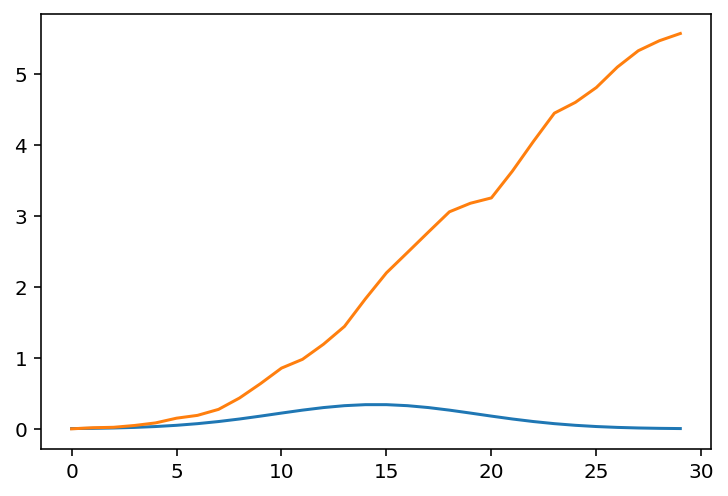

In [19]:
in_x, out = gen_random_xy(30)
plt.plot(in_x)
plt.plot(out); plt.show()

In [21]:
# 입력 및 출력 데이터 샘플 생성
N = 200 # 입력 샘플 수
n_steps = 30
X, y = [],[]
for i in range(N):
    in_x, out = gen_random_xy(n_steps)
    X.append(in_x)
    y.append(out)
X = np.array(X)
y = np.array(y)

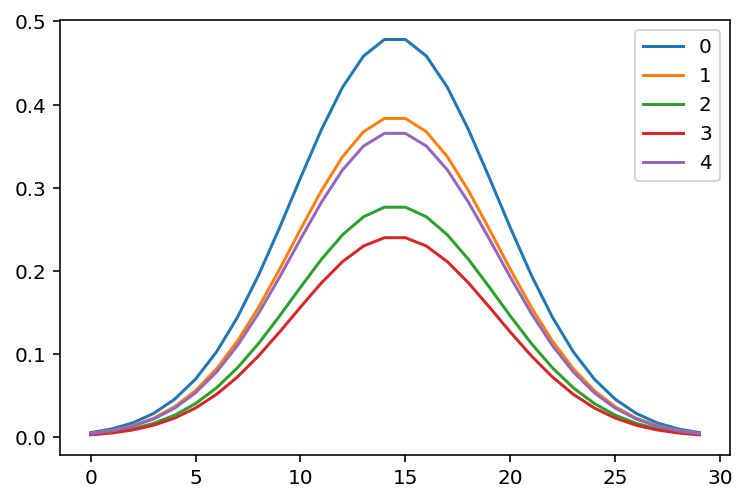

In [22]:
for i in range(5):
    plt.plot(X[i], label=str(i))
    plt.legend()

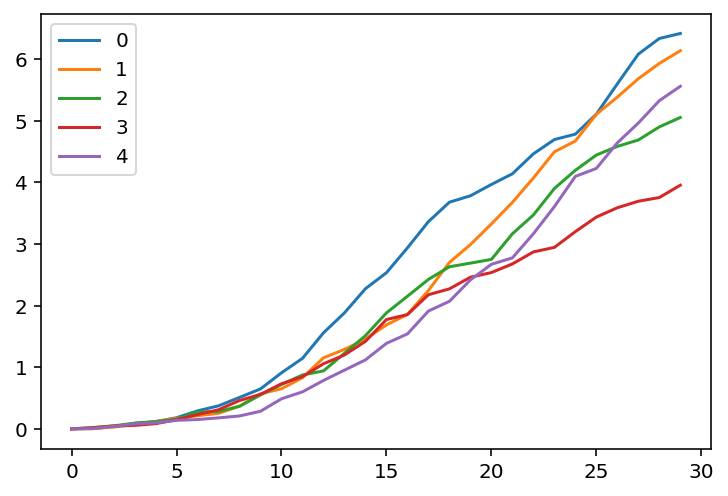

In [23]:
for i in range(5):
    plt.plot(y[i], label=str(i))
    plt.legend()

In [24]:
X.shape, y.shape

((200, 30), (200, 30))

In [25]:
X_all = X.copy()

### 모든 입력 데이터를 사용한 다중회귀 예측

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_all, y, random_state=9)

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
rfr = RandomForestRegressor(n_estimators=20)
rfr.fit(X_train, y_train)

RandomForestRegressor(n_estimators=20)

## 컬럼별로 r2 구하기
- 30개의 컬럼(시계열 데이터)이 있다
- 각 컬럼별로 r2 구하기

In [33]:
x = np.arange(24).reshape(6,4)
print(x)
# (1)
x.mean(axis=0) # 세로방향, 컬럼별 연산(평균, r2 등) 다중 목적 변수 y1, y2, y3, y4)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]]


array([10., 11., 12., 13.])

In [34]:
# (2)
x.mean(axis=1) # 가로방향, 행단위 연산(평균, r2 등을 구할 때도 있다) - 향후 12개월 매출 예측

array([ 1.5,  5.5,  9.5, 13.5, 17.5, 21.5])

In [29]:
y_pred = rfr.predict(X_test)
# 아래는 의미 없는 결과

r2_score(y_test, y_pred, multioutput="raw_values")

array([ 0.99968581, -0.40165298, -0.88077273, -1.3728602 , -0.79647951,
       -0.58492898, -0.46607174, -0.75355842, -0.40136662, -0.08673835,
        0.08199959,  0.34376486,  0.51771216,  0.66725946,  0.72740891,
        0.75014141,  0.78404135,  0.76332635,  0.79772802,  0.79224589,
        0.7912144 ,  0.73935641,  0.72988012,  0.71029416,  0.70287862,
        0.66867375,  0.6975161 ,  0.65178721,  0.59364765,  0.59446088])

In [19]:
r2_score(y_test, y_pred, multioutput="raw_values").mean()

0.2871264188492871

## 행별로 R2 구하기
- 샘플별, 시계열 데이터를 대상으로 r2 구하기

In [36]:
y_test.shape

(50, 30)

In [35]:
r2_score(y_test.T, y_pred.T, multioutput="raw_values")

array([0.95309274, 0.99296365, 0.97891212, 0.94938541, 0.89438613,
       0.90689517, 0.99420026, 0.96987819, 0.97317468, 0.99307815,
       0.9627418 , 0.97643133, 0.99497033, 0.89837788, 0.99253469,
       0.98878678, 0.9970507 , 0.96246724, 0.94241543, 0.93500746,
       0.9385075 , 0.9941174 , 0.96960775, 0.9872129 , 0.93603425,
       0.89083744, 0.99227196, 0.96906563, 0.99137899, 0.97083641,
       0.9951131 , 0.99194771, 0.98310993, 0.98960997, 0.93409129,
       0.98757742, 0.99297217, 0.98905932, 0.918641  , 0.98980378,
       0.99372107, 0.98520148, 0.98501792, 0.99521288, 0.81617037,
       0.97053199, 0.99738622, 0.96191051, 0.96731106, 0.99408516])

In [21]:
r2_score(y_test.T, y_pred.T, multioutput="raw_values").mean()

0.962856750633131

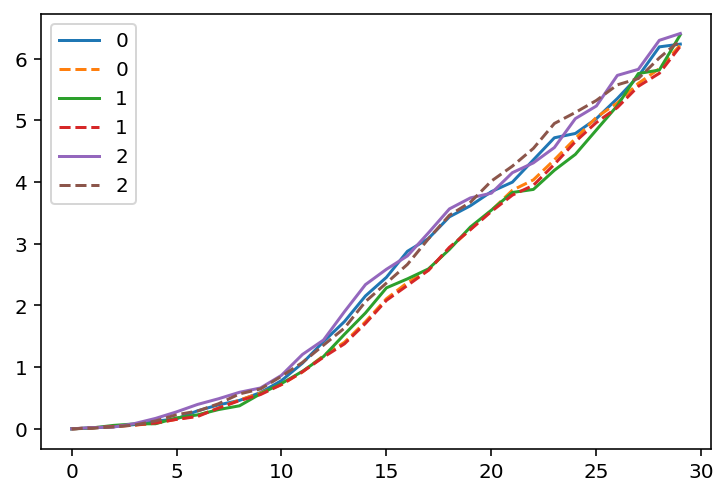

In [22]:
# 실제값과 예측치 (행 단위)
for i in range(3):
    plt.plot(y_test[i], label=str(i))
    plt.plot(y_pred[i], '--', label=str(i))
    plt.legend()

### 입력으로 30개가 아닌 일부 샘플만 사용하는 경우

In [23]:
X.shape

(200, 30)

In [24]:
# 일부 샘플 5개만 사용하는 경우
# n_interval = 5
# xn = np.int(n_steps/n_interval)
# x_sample = [xn*(i+1)-1 for i in range(n_interval)]

# 5개 위치 샘플만 입력(X)으로 사용

x_sample = [5, 11, 17, 23, 29]
X_part = X[:,x_sample]

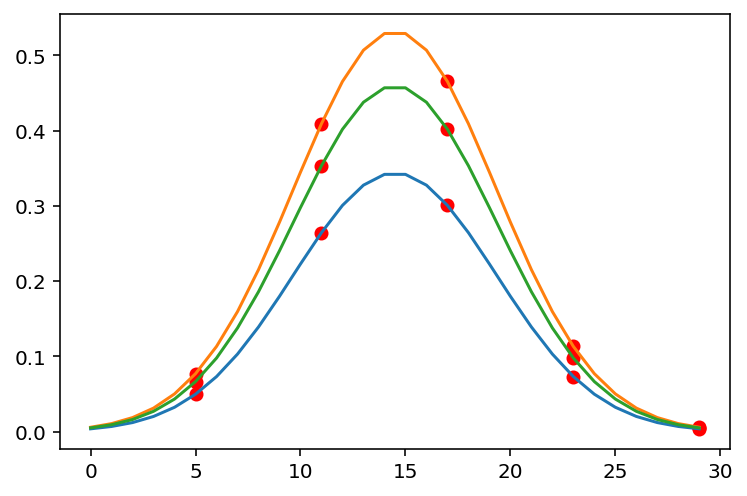

In [25]:
for i in range(3):
    plt.plot(X[i])
    plt.scatter(x_sample, X_part[i], c='r')

### 성능 비교

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_part, y, random_state=9)
X_train.shape, y_train.shape

((150, 5), (150, 30))

In [27]:
rfr = RandomForestRegressor(n_estimators=20)
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)

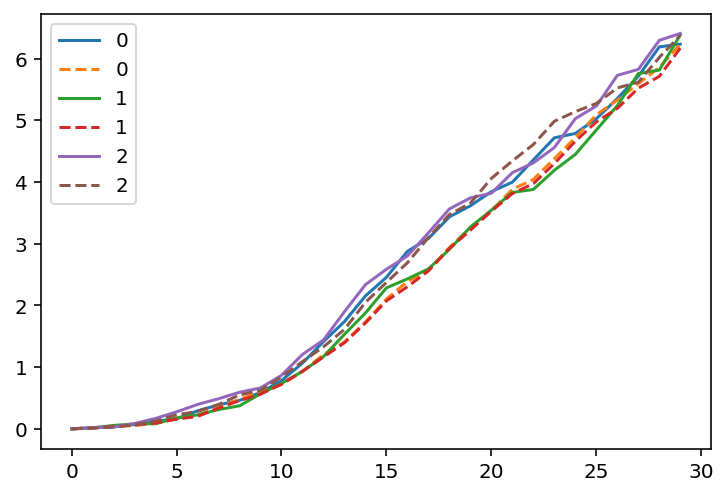

In [28]:
for i in range(3):
    plt.plot(y_test[i], label=str(i))
    plt.plot(y_pred[i], '--', label=str(i))
    plt.legend()

In [29]:
r2_score(y_test.T, y_pred.T, multioutput="raw_values").mean()

0.9636305178054332

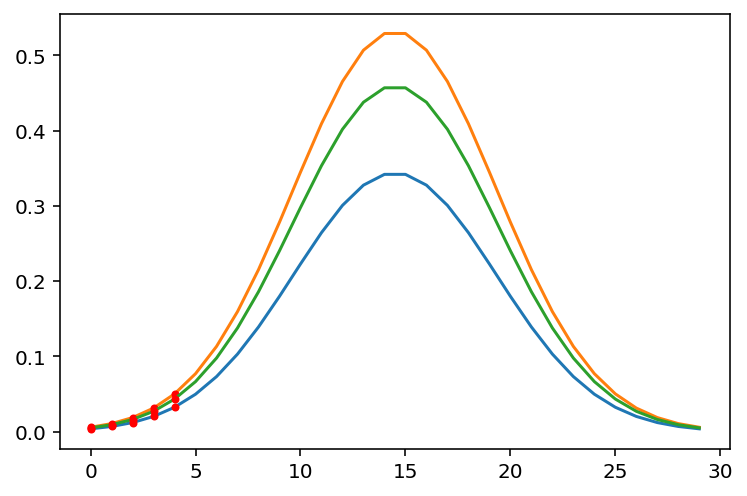

In [30]:
# 다른 예제: 앞 부분의 일부(5개) 샘플만 사용하는 경우
X_part = X[:,:5]
for i in range(3):    
    plt.plot(X[i])
    plt.plot(X_part[i], 'r.')

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_part, y, random_state=9)
rfr = RandomForestRegressor(n_estimators=20)
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)
r2_score(y_test.T, y_pred.T, multioutput="raw_values").mean()

0.9638684919579629